**Vamos experimentar agora o algoritmo Decision Tree?**

In [13]:
!pip install yellowbrick scikit-learn --quiet
!pip install --upgrade yellowbrick
!pip install setuptools
!pip install --upgrade setuptools

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier


In [15]:
import pickle
with open('train.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [16]:
# Supondo que você tenha uma coluna 'Name' que não é útil para o modelo
X_treino = X_treino.drop(columns=['Name'])  # Remova a coluna 'Name'
X_treino = X_treino.drop(columns=['Ticket'])

# Agora, treine o modelo
modelo = DecisionTreeClassifier(criterion='entropy',max_depth=3)
Y = modelo.fit(X_treino, y_treino)



> **Vamos testar o modelo?**



In [17]:
# Remover as colunas desnecessárias de X_teste
X_teste = X_teste.drop(columns=['Name', 'Ticket'])

previsoes = modelo.predict(X_teste)

In [18]:
previsoes

array(['S', 'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'Q', 'S', 'S', 'S', 'S',
       'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'C', 'S', 'S', 'S', 'Q', 'S',
       'S', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'Q',
       'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'Q', 'S',
       'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'C', 'S',
       'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S'], dtype=



> **Será se o modelo acertou?**



In [19]:
y_teste

709    C
439    S
840    S
720    S
39     C
      ..
433    S
773    C
25     S
84     S
10     S
Name: Embarked, Length: 179, dtype: object

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.6983240223463687

In [21]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste,previsoes)

array([[  4,   0,  39],
       [  0,   9,   8],
       [  6,   1, 112]])

c:\Users\User\Desktop\IA\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6983240223463687

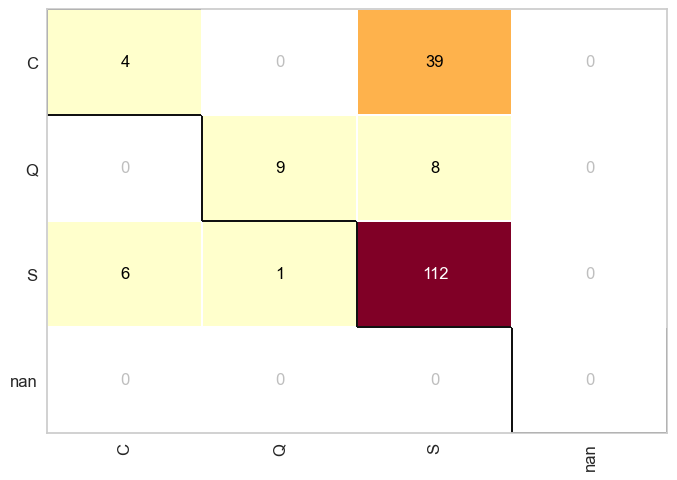

In [22]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [23]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           C       0.40      0.09      0.15        43
           Q       0.90      0.53      0.67        17
           S       0.70      0.94      0.81       119

    accuracy                           0.70       179
   macro avg       0.67      0.52      0.54       179
weighted avg       0.65      0.70      0.64       179



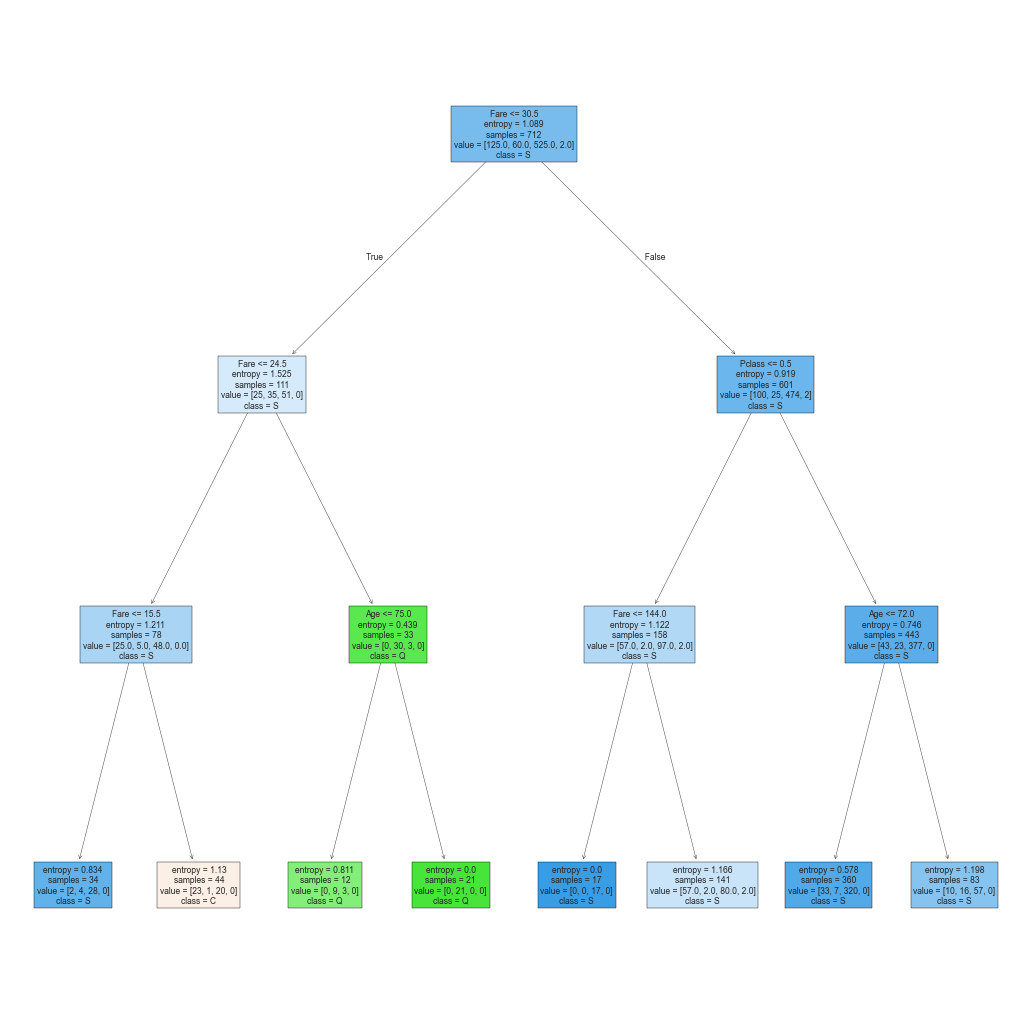

In [24]:
from sklearn import tree
previsores = X_treino.columns
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(13,13))
tree.plot_tree(modelo, feature_names=previsores, class_names = modelo.classes_, filled=True);